In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def readsummary(foldername):
    return pd.read_csv(
            f"{foldername}/summary.txt",
            header=None,
            sep=r"\s+",
            names=[
                "step number",
                "age",
                "mass",
                "luminosity",
                "radius",
                "surface temperature",
                "central temperature",
                "central density",
                "central pressure",
                "central electron degeneracy parameter",
                "central hydrogen mass fraction",
                "central helium mass fraction",
                "central carbon mass fraction",
                "central nitrogen mass fraction",
                "central oxygen mass fraction",
                "dynamical timescale",
                "kelvin-helmholtz timescale",
                "nuclear timescale",
                "luminosity from PP chain",
                "luminosity from CNO cycle",
                "luminosity from triple-alpha reactions",
                "luminosity from metal burning",
                "luminosity of neutrino losses",
                "mass of helium core",
                "mass of carbon core",
                "mass of oxygen core",
                "radius of helium core",
                "radius of carbon core",
                "radius of oxygen core",
            ],
        )


def plot_features(variable_list, variable_names, xvalues, constant_value = 0.02, xaxis='mass',together_on_one_figure="False"):
    if xaxis == 'mass':
        xlabel = r"mass [$M_\mathrm{Sun}$]"
        print(f"Generating plots for constant metallicity {constant_value}")
    elif xaxis == 'metallicity':
        xlabel = "metallicity"
        print(f"Generating plots for constant mass {constant_value}")
    elif xaxis == 'age':
        xlabel = 'age [Mljn yrs?]'
    else:
        print("wdymmm")

    if together_on_one_figure == "True":
        for k,feature in enumerate(variable_list):
            #plt.figure(figsize=(8, 5), dpi=150)
            plt.plot(xvalues, feature,label=variable_names[k])
            plt.xlabel(xlabel)
            plt.ylabel(variable_names[k])
        plt.legend()
        plt.show()
    else:
        for k,feature in enumerate(variable_list):
            #plt.figure(figsize=(8, 5), dpi=150)
            plt.scatter(xvalues, feature,label=variable_names[k])
            plt.xlabel(xlabel)
            plt.ylabel(variable_names[k])
            plt.legend()
            plt.show()



def get_summary_data(variable_names, foldername,iteration=1):
    variables = np.zeros(len(variable_names))
    df = readsummary(foldername)
    return [df[variable][iteration] for variable in variable_names]


def get_data_for_more_folders(variable_names, foldernames, iteration=1, xaxis="mass",plot='True'): #mass must always be the last of the variable names
    
    data = np.zeros((len(foldernames),len(variable_names)))
    
    for k,foldername in enumerate(foldernames):
        variables = get_summary_data(variable_names,f"Data ex2/{foldername}",iteration)
        data[k] = variables
    
    if xaxis == "mass":
        xvalues = data[:,-1]
        constant_value=0.02 #metallicity

    elif xaxis == "metallicity":
        xvalues = np.array([0.0001,0.0003,0.001,0.004,0.01,0.02,0.03]) #metallicities
        constant_value = data[1,-1,]

    if plot == 'True':
        plot_features(data[:,:-1].T,variable_names[:-1],xvalues,constant_value,xaxis)
        return data

    else:
        return data

Generating plots for constant metallicity 0.02


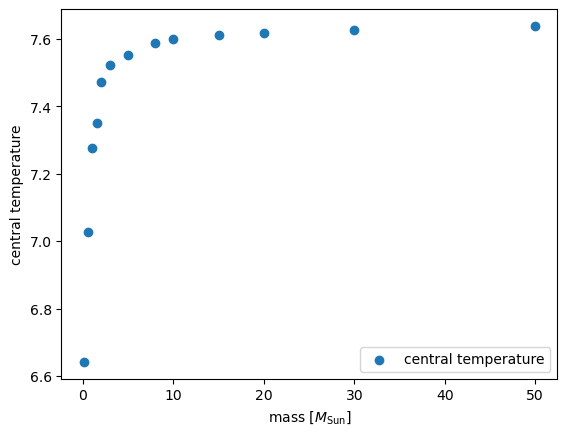

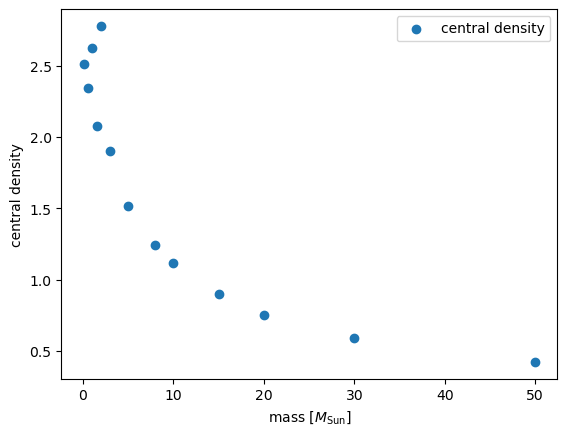

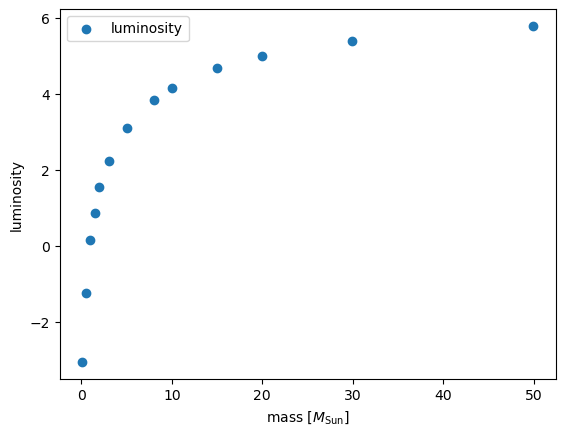

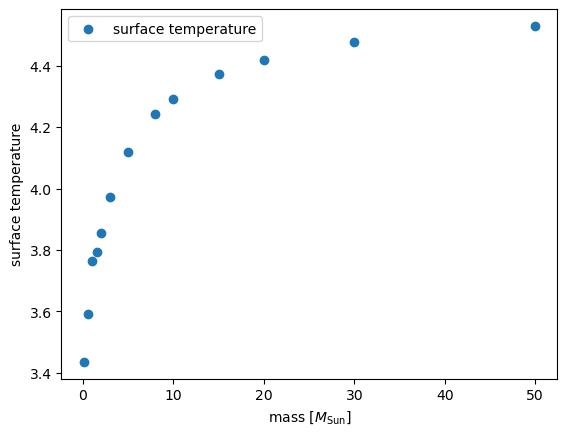

Generating plots for constant mass 7.99240917


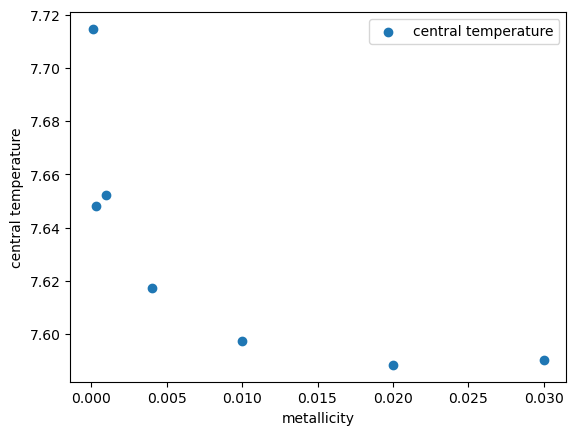

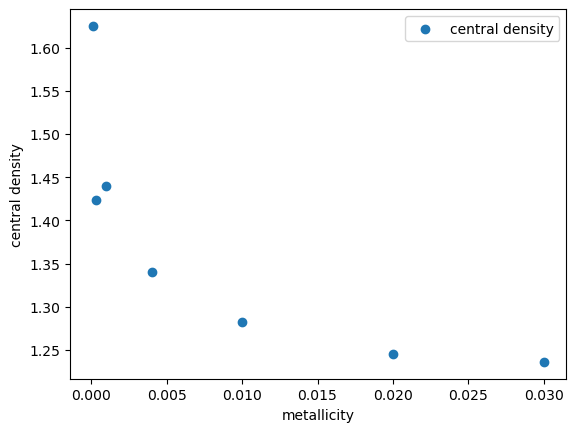

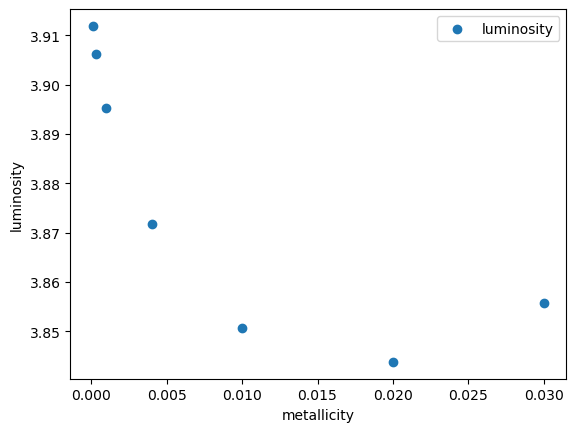

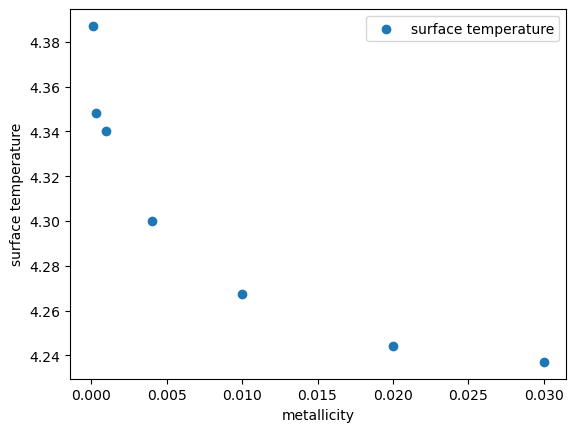

Generating plots for constant mass 99.9512417


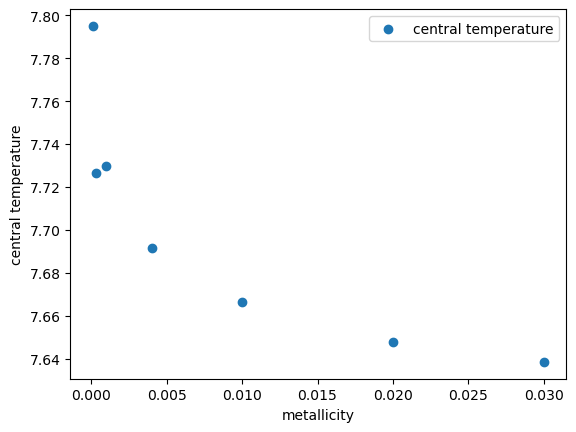

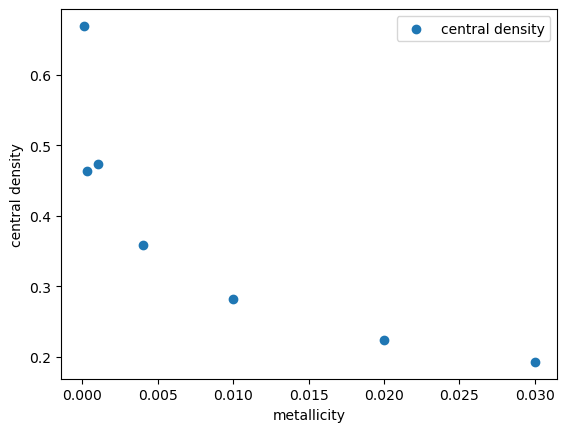

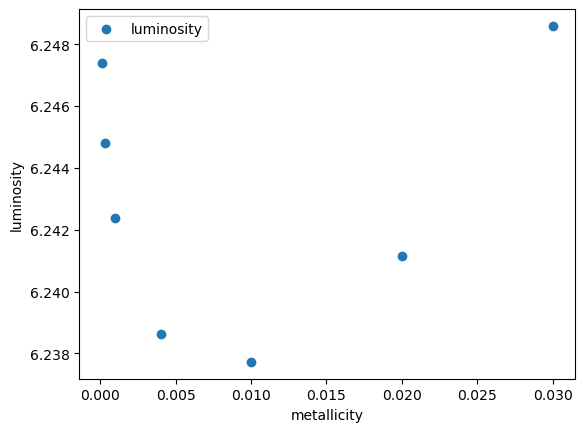

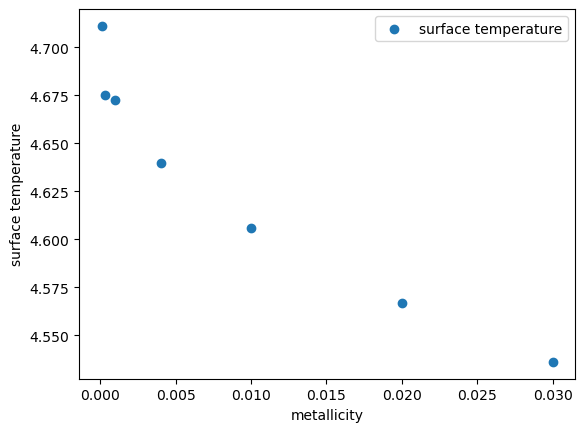

In [43]:
massfoldernames = ["mass01","mass05","mass10","mass15",'mass20',"mass30","mass50",'mass80','mass100',"mass150","mass200","mass300","mass500"]
met8foldernames = ["mass_8_metallicity_0001","mass_8_metallicity_0003","mass_8_metallicity_001","mass_8_metallicity_004","mass_8_metallicity_01","mass_8_metallicity_02","mass_8_metallicity_03"]
met100foldernames = ["mass_100_metallicity_0001","mass_100_metallicity_0003","mass_100_metallicity_001","mass_100_metallicity_004","mass_100_metallicity_01","mass_100_metallicity_02","mass_100_metallicity_03"]

variables = ["central temperature", "central density", "luminosity", "surface temperature","mass"]
all_data = []
for foldernames in [massfoldernames,met8foldernames,met100foldernames]:
    if foldernames == massfoldernames:
        data = get_data_for_more_folders(variables,foldernames,iteration=100)
        all_data.append(data)
    else:
        data = get_data_for_more_folders(variables,foldernames,iteration=100,xaxis="metallicity")
        all_data.append(data)

In [44]:
all_data

[array([[ 6.64151441,  2.51603827, -3.05078233,  3.43468782,  0.09987432],
        [ 7.0262357 ,  2.34902833, -1.22323014,  3.59067994,  0.49927331],
        [ 7.27583417,  2.62811946,  0.167647  ,  3.76380852,  0.99902598],
        [ 7.34983441,  2.07998336,  0.85788401,  3.79369688,  1.49828533],
        [ 7.47279254,  2.78163237,  1.55373711,  3.85589146,  1.99708448],
        [ 7.5220312 ,  1.90104811,  2.22847742,  3.97282045,  2.99583019],
        [ 7.55219069,  1.51862191,  3.10391373,  4.11963453,  4.99357531],
        [ 7.5883544 ,  1.24576402,  3.84378221,  4.24400556,  7.99022173],
        [ 7.59902209,  1.11675361,  4.16126049,  4.2930026 ,  9.98795251],
        [ 7.61281259,  0.89685725,  4.67984705,  4.37238452, 14.982242  ],
        [ 7.61875269,  0.75216133,  5.00348852,  4.42056185, 19.9766337 ],
        [ 7.62769361,  0.5874245 ,  5.38698233,  4.47732695, 29.9681114 ],
        [ 7.63807326,  0.41979051,  5.78520209,  4.52945339, 49.9566015 ]]),
 array([[7.71471819, 1.

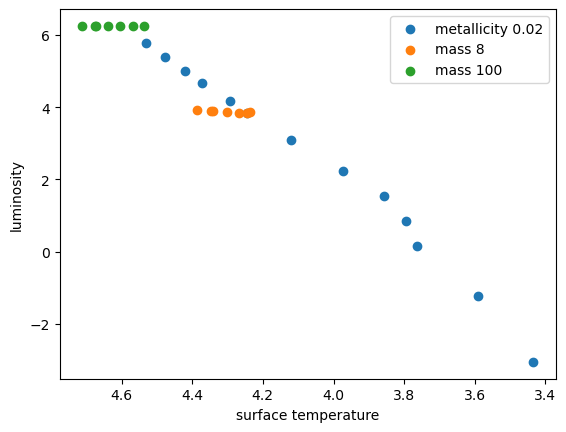

In [45]:
surface_temperatures = [all_data[i][:,3] for i in range(3)]
luminosities = [all_data[i][:,2] for i in range(3)]
plt.scatter(surface_temperatures[0],luminosities[0],label="metallicity 0.02")
plt.scatter(surface_temperatures[1],luminosities[1],label="mass 8")
plt.scatter(surface_temperatures[2],luminosities[2],label="mass 100")
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel("surface temperature")
plt.ylabel("luminosity")
plt.show()